<a href="https://colab.research.google.com/github/khanhlam16/Bai-tap-nhan-dien/blob/main/nhan_dien_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/mon an/train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 576 images belonging to 10 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/mon an/validation', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 53 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'banh beo': 0,
 'banh bong lan': 1,
 'banh chung': 2,
 'banh mi': 3,
 'banh pia': 4,
 'banh trang nuong': 5,
 'banh xeo': 6,
 'bun dau': 7,
 'com suon': 8,
 'pho': 9}

In [ ]:
val_set.class_indices

{'banh beo': 0,
 'banh bong lan': 1,
 'banh chung': 2,
 'banh mi': 3,
 'banh pia': 4,
 'banh trang nuong': 5,
 'banh xeo': 6,
 'bun dau': 7,
 'com suon': 8,
 'pho': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/100
18/18 [==============================] - 49s 3s/step - loss: 1.6234 - accuracy: 0.3941 - val_loss: 1.8728 - val_accuracy: 0.3585
Epoch 2/100
18/18 [==============================] - 12s 644ms/step - loss: 1.6211 - accuracy: 0.4201 - val_loss: 1.7843 - val_accuracy: 0.3208
Epoch 3/100
18/18 [==============================] - 12s 693ms/step - loss: 1.5767 - accuracy: 0.4236 - val_loss: 1.7937 - val_accuracy: 0.3585
Epoch 4/100
18/18 [==============================] - 12s 684ms/step - loss: 1.4625 - accuracy: 0.4601 - val_loss: 2.0509 - val_accuracy: 0.3585
Epoch 5/100
18/18 [==============================] - 12s 681ms/step - loss: 1.4944 - accuracy: 0.4566 - val_loss: 1.7132 - val_accuracy: 0.3962
Epoch 6/100
18/18 [==============================] - 12s 668ms/step - loss: 1.4657 - accuracy: 0.4705 - val_loss: 1.7052 - val_accuracy: 0.4151
Epoch 7/100
18/18 [==============================] - 12s 679ms/step - loss: 1.3148 - accuracy: 0.5521 - val_loss: 1.6361 - val_accuracy: 0.

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.023823104798793793
Train Accuracy 0.9913194179534912


<function matplotlib.pyplot.show(*args, **kw)>

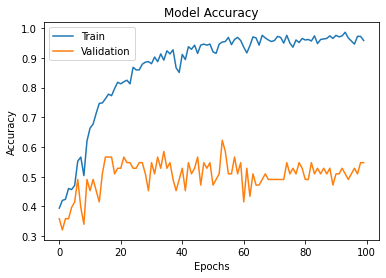

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("mon an.h5")

In [ ]:
model_food=load_model('mon an.h5')

1/1 [==============================] - 0s 25ms/step
Cơm sườn


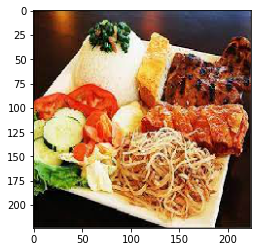

1/1 [==============================] - 0s 15ms/step
Bún đậu


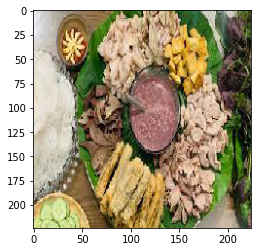

1/1 [==============================] - 0s 16ms/step
Bánh chưng


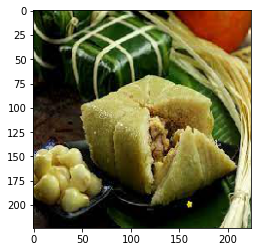

1/1 [==============================] - 0s 15ms/step
Bánh bèo


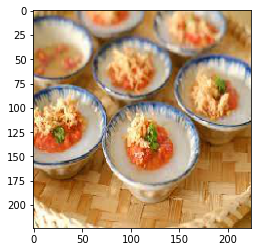

1/1 [==============================] - 0s 15ms/step
Bánh xèo


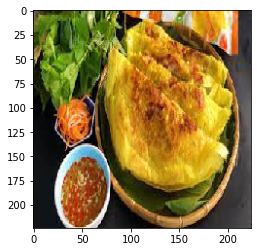

1/1 [==============================] - 0s 15ms/step
Bánh mì


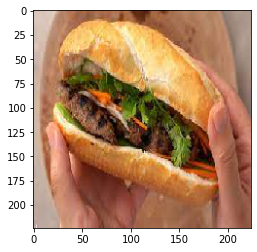

1/1 [==============================] - 0s 15ms/step
Bánh tráng nướng


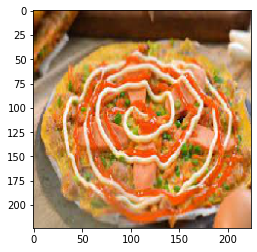

1/1 [==============================] - 0s 21ms/step
Bánh pía


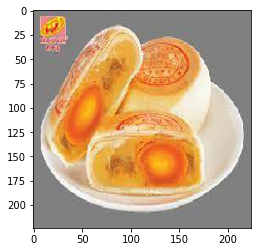

1/1 [==============================] - 0s 23ms/step
Bánh bông lan


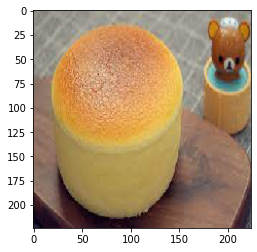

1/1 [==============================] - 0s 16ms/step
Phở


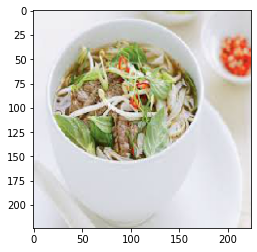

In [ ]:
import os
test = '/content/drive/My Drive/Le Khanh Lam/mon an/test/test1'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_food.predict(img)
  if round(result[0][0])==1:
    prediction='Bánh bèo'
  if round(result[0][1])==1:
    prediction = 'Bánh bông lan'
  if round(result[0][2])==1:
    prediction='Bánh chưng'
  if round(result[0][3])==1:
    prediction='Bánh mì'
  if round(result[0][4])==1:
    prediction='Bánh pía'
  if round(result[0][5])==1:
    prediction='Bánh tráng nướng'
  if round(result[0][6])==1:
    prediction='Bánh xèo'
  if round(result[0][7])==1:
    prediction='Bún đậu'
  if round(result[0][8])==1:
    prediction='Cơm sườn'
  if round(result[0][9])==1:
    prediction='Phở'
  print(prediction)
  plt.show()